# HOUSE PRICE PREDICTION

[](https://i.ytimg.com/vi/LvfbopVq-WE/maxresdefault.jpg)

* SalePrice - the sale price of the property in dollars. This is the target variable you are trying to predict.
* MSSubClass: Construction class
* MSZoning: General zoning classification
* LotFrontage: Whether the property has a direct connection with the street
* LotArea: Parcel size
* Street: Type of road access
* Alley: Street entrance type
* LotShape: General shape of the property
* LandContour: The flatness of the property
* Utulities: Type of services available
* LotConfig: Parcel configuration
* LandSlope: The slope of the property
* Neighborhood: Its physical location within Ames city limits
* Condition1: Proximity to main road or train track
* Condition2: Proximity to the main road or railway (if there is a second location)
* BldgType: Residential type
* HouseStyle: Residential style
* OverallQual: Overall material and finish quality
* OverallCond: General status assessment
* YearBuilt: Original build date
* YearRemodAdd: Reissue date
* RoofStyle: Roof type
* RoofMatl: Roofing material
* Exterior1st: Exterior trim in the house
* Exterior2nd: Exterior coating on the house (if there is more than one material)
* MasVnrType: Type of wall covering
* MasVnrArea: Wall covering area with square feet
* ExterQual: Outer material quality
* ExterCond: The current state of the material outside
* Foundation: Foundation type
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkway or garden floor basement walls
* BsmtFinType1: Quality of the basement finished area
* BsmtFinSF1: Square meters of Type 1 finished area
* BsmtFinType2: Quality of the second finished field (if any)
* BsmtFinSF2: Square meters of Type 2 finished area
* BsmtUnfSF: Square feet of unfinished area of the basement
* TotalBsmtSF: Total square meters of basement area
* Heating: Heating type
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: electrical system
* 1stFlrSF: First Floor square feet area
* 2ndFlrSF: Second floor square feet area
* LowQualFinSF: Low quality finished areas (all floors)
* GrLivArea: Above (floor) seating area square meters
* BsmtFullBath: Full bathrooms in the basement
* BsmtHalfBath: Half baths in the basement
* FullBath: Full baths on the upper floors
* HalfBath: Half baths on the upper floors
* BedroomAbvGr: Number of bedrooms above basement level
* KitchenAbvGr: Number of kitchens above basement level
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms on upper floors (not including bathroom)
* Functional: Home functionality assessment
* Fireplaces: Fireplaces
* FireplaceQu: Fireplace quality
* Garage Type: Garage place
* GarageYrBlt: The year the garage was built
* GarageFinish: The inner surface of the garage
* GarageCars: Vehicle capacity
* GarageArea: The area of ​​the garage
* GarageQual: Garage quality
* GarageCond: Garage status
* PavedDrive: The road between the garage and the road
* WoodDeckSF: Free standing wooden deck area
* OpenPorchSF: Outdoor patio area in front of the door
* EnclosedPorch: Covered patio area in front of the door
* 3SsPorch: Three-season patio area
* ScreenPorch: Patio cover area
* PoolArea: Square meter area of ​​the pool
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Features not found in other categories
* MiscVal: The value of various properties
* MoSold: Month sold
* YrSold: Year sold
* SaleType: SaleType
* SaleCondition: Sale Status

### Importing libraries

In [1]:

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
#from helpers.data_prep import *
#from helpers.eda import *
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

from sklearn import preprocessing

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("../input/houseprice/house_price_prediction.csv")

## EDA
1. General Picture
1. Categorical Variable Analysis
1. Numerical Variable Analysis
1. Target Variable Analysis
1. Correlation Analysis

## 1. General Picture

In [3]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

##################### Shape #####################
(1460, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2  

In [4]:
# Determination of categorical and numeric variables

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [5]:
cat_cols,  num_cols, cat_but_car = grab_col_names(df)

Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


## 2. Categorical Variable Analysis

In [6]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}),  end="\n\n\n")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)

         MSZoning  Ratio
RL           1151 78.836
RM            218 14.932
FV             65  4.452
RH             16  1.096
C (all)        10  0.685


      Street  Ratio
Pave    1454 99.589
Grvl       6  0.411


      Alley  Ratio
Grvl     50  3.425
Pave     41  2.808


     LotShape  Ratio
Reg       925 63.356
IR1       484 33.151
IR2        41  2.808
IR3        10  0.685


     LandContour  Ratio
Lvl         1311 89.795
Bnk           63  4.315
HLS           50  3.425
Low           36  2.466


        Utilities  Ratio
AllPub       1459 99.932
NoSeWa          1  0.068


         LotConfig  Ratio
Inside        1052 72.055
Corner         263 18.014
CulDSac         94  6.438
FR2             47  3.219
FR3              4  0.274


     LandSlope  Ratio
Gtl       1382 94.658
Mod         65  4.452
Sev         13  0.890


        Condition1  Ratio
Norm          1260 86.301
Feedr           81  5.548
Artery          48  3.288
RRAn            26  1.781
PosN            19  1.301
RRAe            1

## 3. Numerical Variable Analysis

In [7]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col)

count   1460.000
mean     730.500
std      421.610
min        1.000
5%        73.950
10%      146.900
20%      292.800
30%      438.700
40%      584.600
50%      730.500
60%      876.400
70%     1022.300
80%     1168.200
90%     1314.100
95%     1387.050
99%     1445.410
max     1460.000
Name: Id, dtype: float64
#####################################
count   1460.000
mean      56.897
std       42.301
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64
#####################################
count   1201.000
mean      70.050
std       24.285
min       21.000
5%        34.000
10%       44.000
20%       53.000
30%       60.000
40%       63.000
50%       69.000
60%       74.000
70%       79.000
80%       85.000
90%       96.000
95%      107.000
99%      141.000
max      313.000

## 4. Target Variable Analysis

In [8]:

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"SalePrice",col)

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830


        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539


       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585


          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818


             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747


           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000


           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048


           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231


            TARGET_MEAN


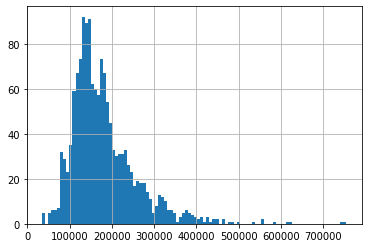

In [9]:
# Examination of the dependent variable
df["SalePrice"].hist(bins=100)
plt.show()

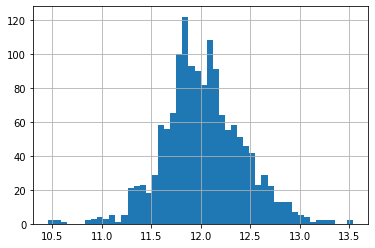

In [10]:
# Examining the logarithm of the dependent variable
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

## 5. Correlation Analysis

In [11]:
corr = df[num_cols].corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
Id,1.000,0.011,-0.011,-0.033,-0.028,-0.013,-0.022,-0.050,-0.005,-0.006,-0.008,-0.015,0.010,0.006,-0.044,0.008,0.027,0.000,0.018,-0.030,-0.000,0.003,-0.047,0.001,-0.006,0.021,-0.022
MSSubClass,0.011,1.000,-0.386,-0.140,0.033,0.028,0.041,0.023,-0.070,-0.066,-0.141,-0.239,-0.252,0.308,0.046,0.075,0.040,0.085,-0.099,-0.013,-0.006,-0.012,-0.044,-0.026,-0.008,-0.014,-0.084
LotFrontage,-0.011,-0.386,1.000,0.426,0.252,0.123,0.089,0.193,0.234,0.050,0.133,0.392,0.457,0.080,0.038,0.403,0.352,0.070,0.345,0.089,0.152,0.011,0.070,0.041,0.003,0.011,0.352
LotArea,-0.033,-0.140,0.426,1.000,0.106,0.014,0.014,0.104,0.214,0.111,-0.003,0.261,0.299,0.051,0.005,0.263,0.190,-0.025,0.180,0.172,0.085,-0.018,0.020,0.043,0.038,0.001,0.264
OverallQual,-0.028,0.033,0.252,0.106,1.000,0.572,0.551,0.412,0.240,-0.059,0.308,0.538,0.476,0.295,-0.030,0.593,0.427,0.548,0.562,0.239,0.309,-0.114,0.030,0.065,-0.031,0.071,0.791
YearBuilt,-0.013,0.028,0.123,0.014,0.572,1.000,0.593,0.316,0.250,-0.049,0.149,0.391,0.282,0.010,-0.184,0.199,0.096,0.826,0.479,0.225,0.189,-0.387,0.031,-0.050,-0.034,0.012,0.523
YearRemodAdd,-0.022,0.041,0.089,0.014,0.551,0.593,1.000,0.180,0.128,-0.068,0.181,0.291,0.240,0.140,-0.062,0.287,0.192,0.642,0.372,0.206,0.226,-0.194,0.045,-0.039,-0.010,0.021,0.507
MasVnrArea,-0.050,0.023,0.193,0.104,0.412,0.316,0.180,1.000,0.265,-0.072,0.114,0.364,0.345,0.175,-0.069,0.391,0.281,0.253,0.373,0.160,0.126,-0.110,0.019,0.061,-0.030,-0.006,0.477
BsmtFinSF1,-0.005,-0.070,0.234,0.214,0.240,0.250,0.128,0.265,1.000,-0.050,-0.495,0.522,0.446,-0.137,-0.065,0.208,0.044,0.153,0.297,0.204,0.112,-0.102,0.026,0.062,0.004,-0.016,0.386
BsmtFinSF2,-0.006,-0.066,0.050,0.111,-0.059,-0.049,-0.068,-0.072,-0.050,1.000,-0.209,0.105,0.097,-0.099,0.015,-0.010,-0.035,-0.088,-0.018,0.068,0.003,0.037,-0.030,0.089,0.005,-0.015,-0.011


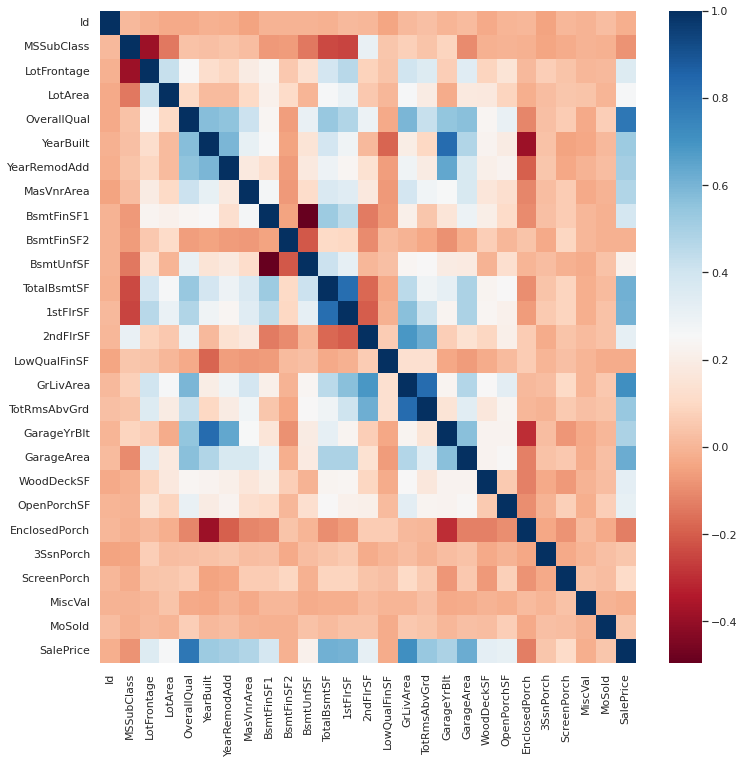

In [12]:
# Display of correlations
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [13]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [14]:
high_correlated_cols(df, plot=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

## Data Preprocessing

1. Outlier Analysis
1. Missing Value Analysis
1. Feature Engineering
1. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)

## 1. Outlier Analysis

In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


low_limit, up_limit = outlier_thresholds(df, "SalePrice")
print("Low Limit : {0} Up Limit : {1}".format(low_limit, up_limit))

Low Limit : 3937.5 Up Limit : 340037.5


In [16]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [17]:
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

Id False
MSSubClass True
LotFrontage True
LotArea True
OverallQual True
YearBuilt True
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt False
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False


In [18]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [19]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

## 2. Missing Value Analysis

In [20]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
missing_values_table(df)

              n_miss  ratio
PoolQC          1453 99.520
MiscFeature     1406 96.300
Alley           1369 93.770
Fence           1179 80.750
FireplaceQu      690 47.260
LotFrontage      259 17.740
GarageType        81  5.550
GarageYrBlt       81  5.550
GarageFinish      81  5.550
GarageQual        81  5.550
GarageCond        81  5.550
BsmtExposure      38  2.600
BsmtFinType2      38  2.600
BsmtFinType1      37  2.530
BsmtCond          37  2.530
BsmtQual          37  2.530
MasVnrArea         8  0.550
MasVnrType         8  0.550
Electrical         1  0.070


In [21]:
# ratio: gives the percentage of missing observations in the column
# n_miss: returns the number of missing observations in each column

In [22]:
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkway or garden floor basement walls
# BsmtFinType1: Quality of the basement finished area
# BsmtFinType2: Quality of the second finished field (if any)
# Null values in some variables indicate that the house does not have that feature.

In [23]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]


In [24]:
# Filling the spaces in the columns with the expression "No"
for col in no_cols:
     df[col].fillna("No",inplace=True)

missing_values_table(df)

             n_miss  ratio
LotFrontage     259 17.740
GarageYrBlt      81  5.550
MasVnrType        8  0.550
MasVnrArea        8  0.550
Electrical        1  0.070


In [25]:
# Filling missing values ​​with mean or median values
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if
                         data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x,
                      axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [26]:
df = quick_missing_imp(df, num_method="median", cat_length=17)
df.columns

# BEFORE
LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64 




Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
df["SalePrice"].mean()

180921.19589041095

In [28]:
df["SalePrice"].std()

79442.50288288662

### Rare

In [29]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
         COUNT  RATIO  TARGET_MEAN
C (all)     10  0.007    74528.000
FV          65  0.045   214014.062
RH          16  0.011   131558.375
RL        1151  0.788   191004.995
RM         218  0.149   126316.830


Street : 2
      COUNT  RATIO  TARGET_MEAN
Grvl      6  0.004   130190.500
Pave   1454  0.996   181130.539


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl     50  0.034   122219.080
No     1369  0.938   183452.131
Pave     41  0.028   168000.585


LotShape : 4
     COUNT  RATIO  TARGET_MEAN
IR1    484  0.332   206101.665
IR2     41  0.028   239833.366
IR3     10  0.007   216036.500
Reg    925  0.634   164754.818


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk     63  0.043   143104.079
HLS     50  0.034   231533.940
Low     36  0.025   203661.111
Lvl   1311  0.898   180183.747


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   1459  0.999   180950.957
NoSeWa      1  0.001   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     263  

In [30]:
df["ExterCond"] = np.where(df.LotShape.isin(["Fa", "Po"]), "FaPo", df["ExterCond"])
df["ExterCond"] = np.where(df.LotShape.isin(["Ex", "Gd"]), "Ex", df["ExterCond"])
df["ExterCond"].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: ExterCond, dtype: object

In [31]:
# LotShape : 4
#      COUNT  RATIO  TARGET_MEAN
# IR1    968  0.332   206101.665
# IR2     76  0.026   239833.366
# IR3     16  0.005   216036.500
# Reg   1859  0.637   164754.818

In [32]:
df["LotShape"] = np.where(df.LotShape.isin(["IR1", "IR2", "IR3"]), "IR", df["LotShape"])

In [33]:
df["GarageQual"] = np.where(df.GarageQual.isin(["Fa", "Po"]), "FaPo", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(["Ex", "Gd"]), "ExGd", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(["ExGd", "TA"]), "ExGd", df["GarageQual"])

In [34]:
# GarageQual : 5
#     COUNT  RATIO  TARGET_MEAN
# Ex      3  0.001   241000.000
# Fa    124  0.042   123573.354
# Gd     24  0.008   215860.714
# Po      5  0.002   100166.667
# TA   2763  0.892   187489.836

In [35]:
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType2"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType2"])

In [36]:
# Detection of rare classes
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

rare_encoder(df,0.01)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.000,60,RL,65.000,8450.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0,150.000,856,GasA,Ex,Y,SBrkr,856.000,854,0,1710.000,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.000,RFn,2,548.000,ExGd,TA,Y,0,61,0,0,0,0,No,No,No,0,2.000,2008,WD,Normal,208500
1,2.000,20,RL,80.000,9600.000,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976.000,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0,284.000,1262,GasA,Ex,Y,SBrkr,1262.000,0,0,1262.000,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460.000,ExGd,TA,Y,298,0,0,0,0,0,No,No,No,0,5.000,2007,WD,Normal,181500
2,3.000,60,RL,68.000,11250.000,Pave,No,IR,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0,434.000,920,GasA,Ex,Y,SBrkr,920.000,866,0,1786.000,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608.000,ExGd,TA,Y,0,42,0,0,0,0,No,No,No,0,9.000,2008,WD,Normal,223500
3,4.000,70,RL,60.000,9550.000,Pave,No,IR,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970.000,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0,540.000,756,GasA,Gd,Y,SBrkr,961.000,756,0,1717.000,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642.000,ExGd,TA,Y,0,35,0,0,0,0,No,No,No,0,2.000,2006,WD,Abnorml,140000
4,5.000,60,RL,84.000,14260.000,Pave,No,IR,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0,490.000,1145,GasA,Ex,Y,SBrkr,1145.000,1053,0,2198.000,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836.000,ExGd,TA,Y,192,84,0,0,0,0,No,No,No,0,12.000,2008,WD,Normal,250000


## 3. Feature Engineering

In [37]:
df["NEW_1st*GrLiv"]=(df["1stFlrSF"]*df["GrLivArea"])

df["NEW_Garage*GrLiv"]=(df["GarageArea"]*df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)

df["TotalGarageQual"] = df[["GarageQual", "GarageCond"]].sum(axis = 1)

df["Overall"] = df[["OverallQual", "OverallCond"]].sum(axis = 1)

df["Exter"] = df[["ExterQual", "ExterCond"]].sum(axis = 1)

df["Qual"] = df[["OverallQual", "ExterQual", "GarageQual", "Fence", "BsmtFinType1", "BsmtFinType2", "KitchenQual", "FireplaceQu"]].sum(axis = 1)

df["Cond"] = df[["OverallCond", "ExterCond", "GarageCond", "BsmtCond", "HeatingQC", "Functional"]].sum(axis = 1)

# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1+df.BsmtFinSF2

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF

df["NEW_TotalFullBath"] = df.BsmtFullBath + df.FullBath
df["NEW_TotalHalfBath"] = df.BsmtHalfBath + df.HalfBath

df["NEW_TotalBath"] = df["NEW_TotalFullBath"] + (df["NEW_TotalHalfBath"]*0.5)

# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)

# LowQualFinSF
df["NEW_LowQualFinSFRatio"] = df.LowQualFinSF / df.NEW_TotalHouseArea

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]

# Overall kitchen score
df["NEW_KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
# Overall fireplace score
df["NEW_FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt


In [38]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]

In [39]:
# dropping variables in drop_list
df.drop(drop_list, axis=1, inplace=True)

## 4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)


In [40]:
# One-Hot Encoding
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 1460
Variables: 103
cat_cols: 62
num_cols: 41
cat_but_car: 0
num_but_cat: 24


In [41]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [42]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

In [43]:
for col in binary_cols:
    label_encoder(df, col)

In [44]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [45]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [46]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_RareExcellent,BsmtFinType2_RareGood,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_FaPo,GarageQual_No,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalGarageQual_ExGdFa,TotalGarageQual_ExGdGd,TotalGarageQual_ExGdTA,TotalGarageQual_FaPoFa,TotalGarageQual_FaPoPo,TotalGarageQual_FaPoTA,TotalGarageQual_NoNo,Exter_ExGd,Exter_ExTA,Exter_FaFa,Exter_FaTA,Exter_GdGd,Exter_GdTA,Exter_TAEx,Exter_TAFa,Exter_TAGd,Exter_TAPo,Exter_TATA,NEW_KitchenScore_Ex,NEW_KitchenScore_Fa,NEW_KitchenScore_FaFa,NEW_KitchenScore_Gd,NEW_KitchenScore_GdGd,NEW_KitchenScore_TA,NEW_KitchenScore_TATA,NEW_KitchenScore_TATATA,NEW_FireplaceScore_Ex,NEW_FireplaceScore_ExEx,NEW_FireplaceScore_ExExEx,NEW_FireplaceScore_Fa,NEW_FireplaceScore_FaFa,NEW_FireplaceScore_FaFaFa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_GdGdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_TA,NEW_FireplaceScore_T

## Modeling


In [47]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [48]:
# Performing log conversion
y = np.log1p(df['SalePrice'])
X = df.drop(["Id", "SalePrice"], axis=1)

In [49]:
y.max()

13.534474352733596

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [51]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [52]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.1475 (LR) 
RMSE: 0.134 (Ridge) 
RMSE: 0.1761 (Lasso) 
RMSE: 0.1572 (ElasticNet) 
RMSE: 0.2344 (KNN) 
RMSE: 0.2072 (CART) 
RMSE: 0.1401 (RF) 
RMSE: 0.2251 (SVR) 
RMSE: 0.1326 (GBM) 
RMSE: 0.1423 (XGBoost) 
RMSE: 0.1334 (LightGBM) 
RMSE: 0.1245 (CatBoost) 


In [53]:
df['SalePrice'].mean()

180921.19589041095

In [54]:
df['SalePrice'].std()

79442.50288288662

## Hyperparameter Optimization

In [55]:
lgbm_model = LGBMRegressor(random_state=46)

In [56]:
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))


In [57]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500,700,1000, 1500, 2000],
               "colsample_bytree": [0.5, 0.7, 1]
             }

In [58]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [59]:
lgbm_gs_best.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 1000}

In [60]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

In [61]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [62]:
lgbm_tuned = LGBMRegressor(**lgbm_gs_best.best_params_).fit(X_train, y_train)

In [63]:
y_pred = lgbm_tuned.predict(X_test)

In [64]:
# Getting the inverse of the LOG transformation made
new_y= np.expm1(y_pred)
new_y_test= np.expm1(y_test)

In [65]:
rmse = np.sqrt(mean_squared_error(new_y_test, new_y))

In [66]:
rmse

23434.464616481837

In [67]:
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

In [68]:
from lightgbm import LGBMClassifier

In [69]:
new_lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.5,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 46,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [70]:
new_y[0]
new_y[1]

230751.25812534284

In [71]:
new_y[0:10]

array([152220.06060056, 230751.25812534, 240264.95228867, 242216.61430768,
       199599.32826156, 114319.48899   , 182706.77884506, 372972.18808083,
       187215.12094214, 132195.46429139])

In [72]:
sp = pd.DataFrame(new_y, columns = ['Sale_price_predict'])
sp.head(10)

,Sale_price_predict
0,152220.061
1,230751.258
2,240264.952
3,242216.614
4,199599.328
5,114319.489
6,182706.779
7,372972.188
8,187215.121
9,132195.464


In [73]:
from sklearn.metrics import r2_score
score_r = r2_score(new_y, new_y_test)
print(f"R^2 Score: {round(score_r, 2)}")

R^2 Score: 0.9


In [74]:
lgbm_model.score(X_train,y_train)

0.9877054810294669

In [75]:
lgbm_model.score(X_test, y_test)

0.9891346793811171